In [2]:
import pandas as pd

# Read Excel file from data folder
df = pd.read_excel('../data/Online Retail.xlsx')

# Show first 5 rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Basic structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# Count of missing values per column
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# Unique countries
df['Country'].unique()

# Unique invoice types
df['InvoiceNo'].sample(5)


379786    569700
215931    555743
346264    567183
178073    552229
63721     541592
Name: InvoiceNo, dtype: object

In [6]:
# Remove cancelled orders (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Remove rows with missing CustomerID
df = df[df['CustomerID'].notnull()]


In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [8]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [9]:
# Check again
df.info()

# Preview first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
#Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline


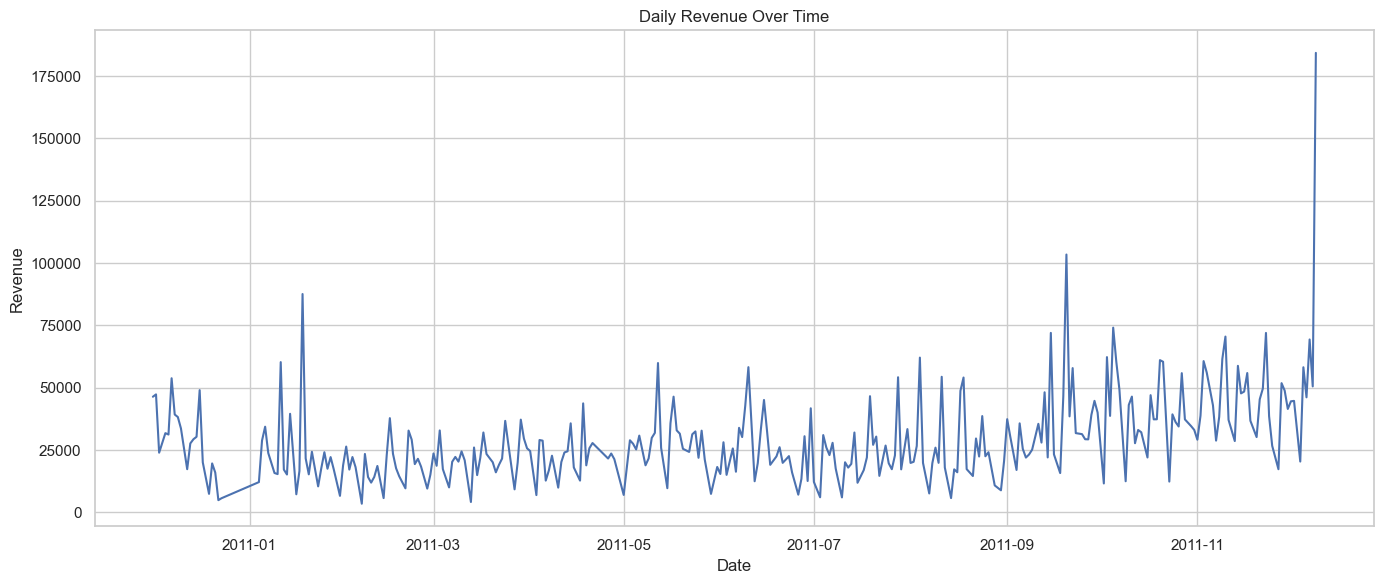

In [12]:
# Group by invoice date (daily revenue)
daily_revenue = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()

# Plot it
plt.figure(figsize=(14, 6))
daily_revenue.plot()
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


C:\Users\yashw\AppData\Local\Temp\ipykernel_18160\1010150560.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


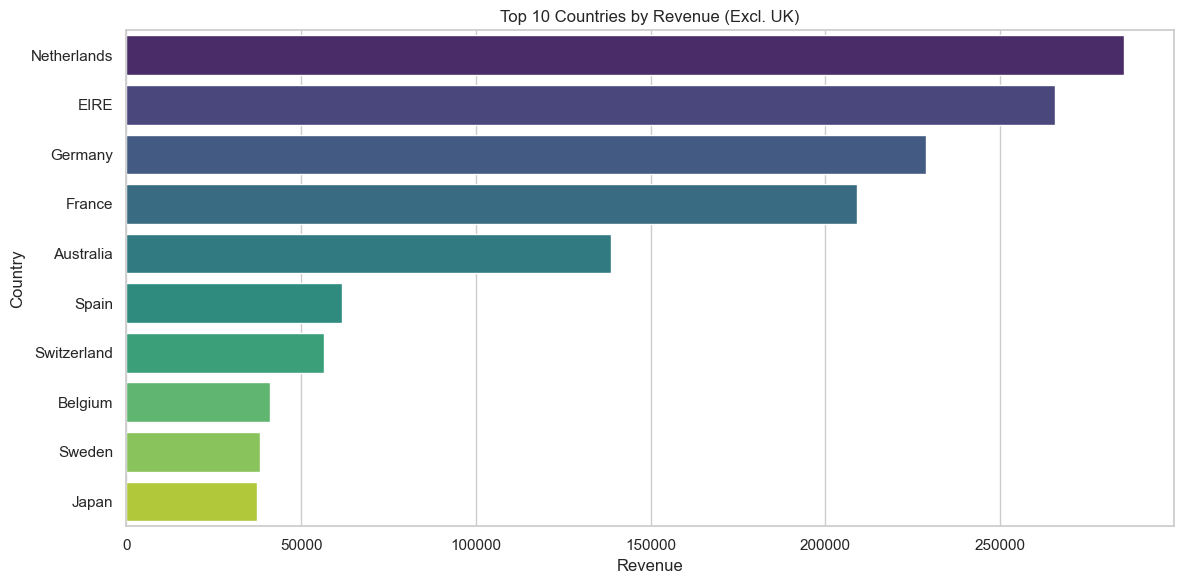

In [14]:
# Top 10 Countries by Revenue (Excl. UK) - Warning-free version
plt.figure(figsize=(12, 6))
sns.barplot(
    x=country_revenue.values,
    y=country_revenue.index,
    palette="viridis",
    hue=None,
    legend=False
)
plt.title('Top 10 Countries by Revenue (Excl. UK)')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


C:\Users\yashw\AppData\Local\Temp\ipykernel_18160\3937632725.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="crest")


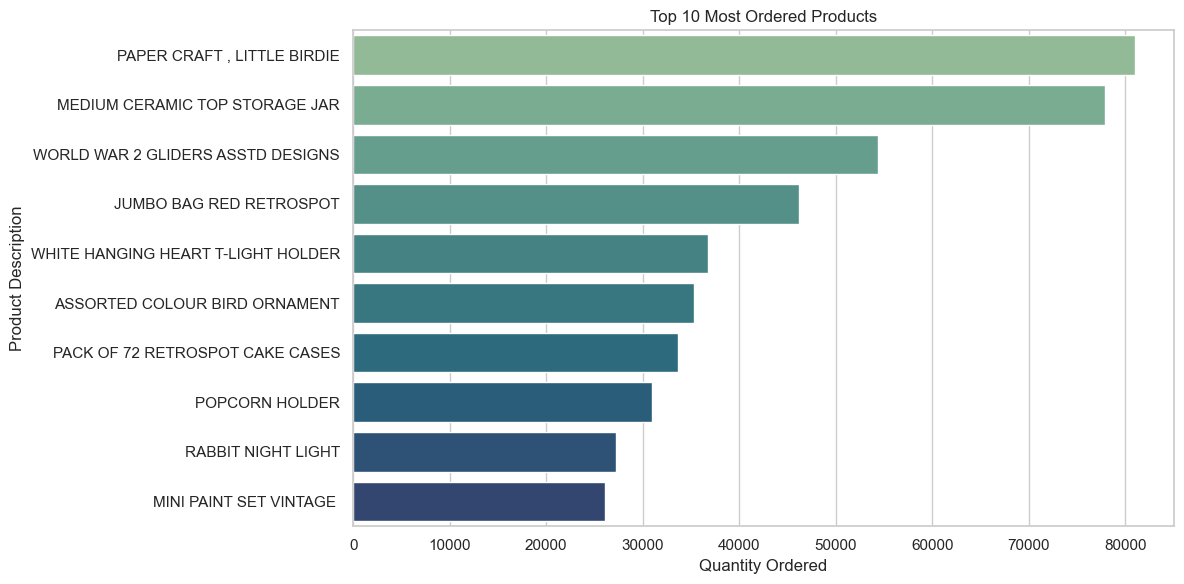

In [16]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="crest")
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


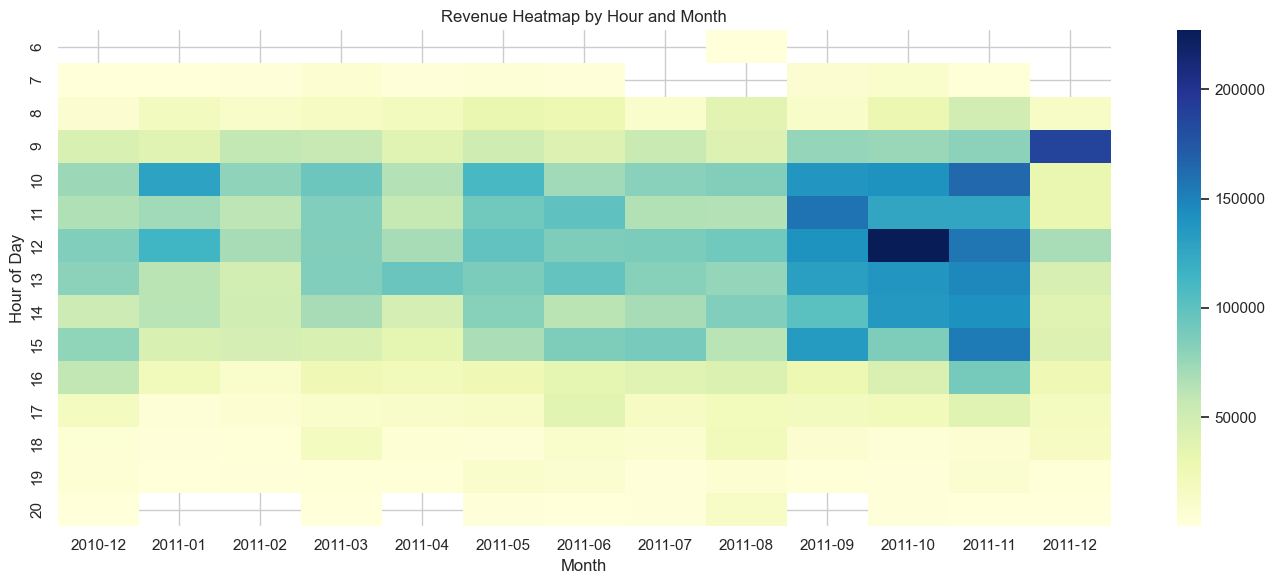

In [17]:
# Add new columns
df['Hour'] = df['InvoiceDate'].dt.hour
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Pivot table
heatmap_data = df.pivot_table(index='Hour', columns='Month', values='TotalPrice', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title('Revenue Heatmap by Hour and Month')
plt.xlabel('Month')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd
import numpy as np


In [19]:
# Choose a snapshot date: 1 day after the last invoice
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Group by customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
})

# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

# Show top 5
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [20]:
# Apply RFM scoring
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])     # Lower recency = better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])  # Higher freq = better
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])    # Higher money = better

# Combine into RFM Segment
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Calculate RFM Score (sum of 3 parts)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)

# View
rfm.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12347.0,2,7,4310.00,4,4,4,444,12
12348.0,75,4,1797.24,2,3,4,234,9
12349.0,19,1,1757.55,3,1,4,314,8
12350.0,310,1,334.40,1,1,2,112,4


In [21]:
# Define segments using RFM Score
rfm['Segment'] = 'Others'
rfm.loc[rfm['RFM_Score'] >= 9, 'Segment'] = 'Champions'
rfm.loc[(rfm['RFM_Score'] >= 7) & (rfm['RFM_Score'] < 9), 'Segment'] = 'Loyal'
rfm.loc[(rfm['RFM_Score'] >= 5) & (rfm['RFM_Score'] < 7), 'Segment'] = 'Potential'
rfm.loc[rfm['RFM_Score'] < 5, 'Segment'] = 'At Risk'

# Check segment distribution
rfm['Segment'].value_counts()


Segment
Champions    1680
Potential     989
Loyal         863
At Risk       807
Name: count, dtype: int64

C:\Users\yashw\AppData\Local\Temp\ipykernel_18160\3741290645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='pastel')


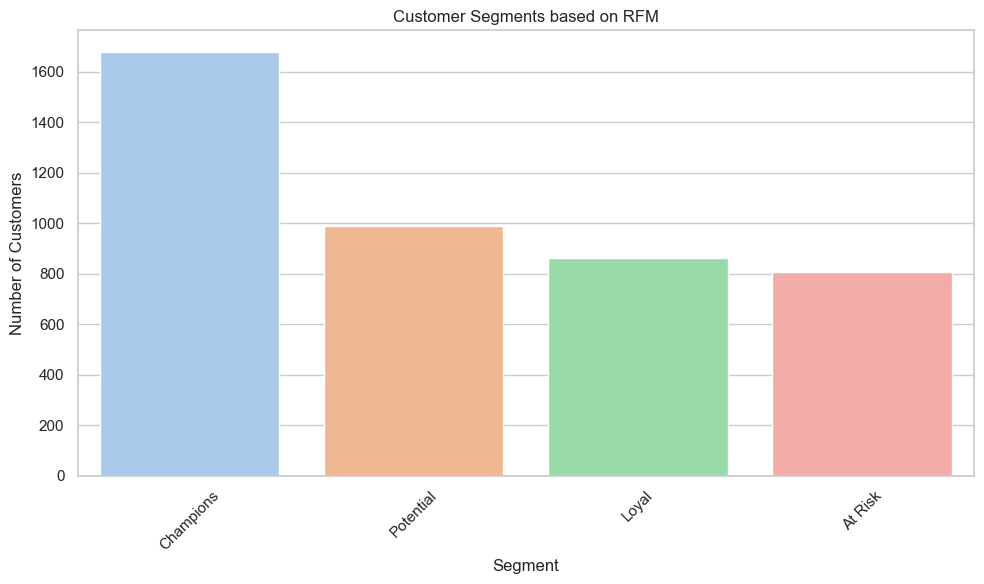

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='pastel')
plt.title('Customer Segments based on RFM')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
rfm.reset_index().to_csv('../output/rfm_segmented_customers.csv', index=False)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [25]:
#Predictive Modeling using Scikit-learn
# Feature variables
X = rfm[['Recency', 'Frequency', 'Monetary']]

# Encode the target (Segment)
le = LabelEncoder()
y = le.fit_transform(rfm['Segment'])


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [28]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[142   0   0  14]
 [  0 351   3   0]
 [  0   4 149  17]
 [ 23   0   7 158]]

Classification Report:
               precision    recall  f1-score   support

     At Risk       0.86      0.91      0.88       156
   Champions       0.99      0.99      0.99       354
       Loyal       0.94      0.88      0.91       170
   Potential       0.84      0.84      0.84       188

    accuracy                           0.92       868
   macro avg       0.91      0.90      0.90       868
weighted avg       0.92      0.92      0.92       868

Accuracy Score: 0.9216589861751152


In [29]:
# Example: Predict a customer with [Recency=10, Frequency=15, Monetary=300]
sample = pd.DataFrame({'Recency': [10], 'Frequency': [15], 'Monetary': [300]})
predicted_class = model.predict(sample)
print("Predicted Segment:", le.inverse_transform(predicted_class))


Predicted Segment: ['Champions']


In [30]:
import joblib
joblib.dump(model, '../output/rfm_segment_predictor.pkl')


['../output/rfm_segment_predictor.pkl']

In [32]:
cd C:\Users\YourUsername\Documents\Customer_Purchase_Analysis


[WinError 3] The system cannot find the path specified: 'C:\\Users\\YourUsername\\Documents\\Customer_Purchase_Analysis'
C:\Users\yashw\Customer_Purchase_Analysis\notebooks


In [34]:
cd C:\Users\yashw\Documents\Customer_Purchase_Analysis


C:\Users\yashw\Documents\Customer_Purchase_Analysis


In [37]:
!git init
!git add .
!git commit -m "Initial commit - Customer Purchase Behavior Analysis Project"
!git branch -M main
!git remote add origin https://github.com/yash102000/customer-purchase-analysis.git
!git push -u origin main


Initialized empty Git repository in C:/Users/yashw/Documents/Customer_Purchase_Analysis/.git/
[master (root-commit) 632e0a1] Initial commit - Customer Purchase Behavior Analysis Project
 2 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 README.md
 create mode 100644 requirements.txt


To https://github.com/yash102000/customer-purchase-analysis.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/yash102000/customer-purchase-analysis.git'
hint: Updates were rejected because the remote contains work that you do not
hint: have locally. This is usually caused by another repository pushing to
hint: the same ref. If you want to integrate the remote changes, use
hint: 'git pull' before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [39]:
!git branch -M main
!git remote add origin https://github.com/yash102000/customer-purchase-analysis.git


error: remote origin already exists.


In [41]:
!git pull origin main --allow-unrelated-histories


Auto-merging README.md
Merge made by the 'ort' strategy.
 README.md | 2 ++
 1 file changed, 2 insertions(+)


From https://github.com/yash102000/customer-purchase-analysis
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       -> origin/main


In [42]:
!git push origin main


To https://github.com/yash102000/customer-purchase-analysis.git
   d23ad52..7835a31  main -> main


In [46]:
!move path/to/Customer_Purchase_Analysis.ipynb .



The system cannot find the path specified.
